Sample rate: 5000 Hz
Data shape: (132561,)


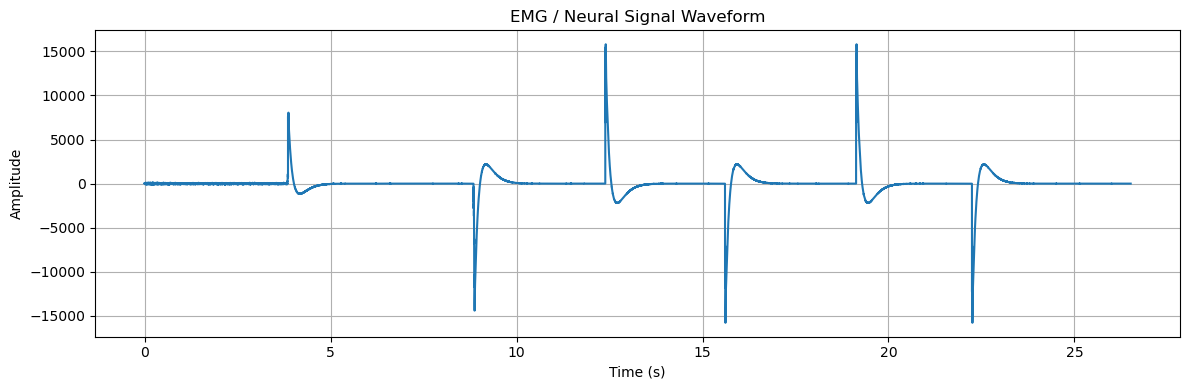

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the .wav file
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/BYB_Recording_2025-04-28_17.20.37.wav')

# Print basic info
print(f"Sample rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")

# If stereo, take only one channel
if len(data.shape) > 1:
    data = data[:, 0]  # use left channel

# Create time axis in seconds
time = np.linspace(0, len(data) / sample_rate, num=len(data))

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.title("EMG / Neural Signal Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


Sample rate: 44100 Hz
Data shape: (89316,)


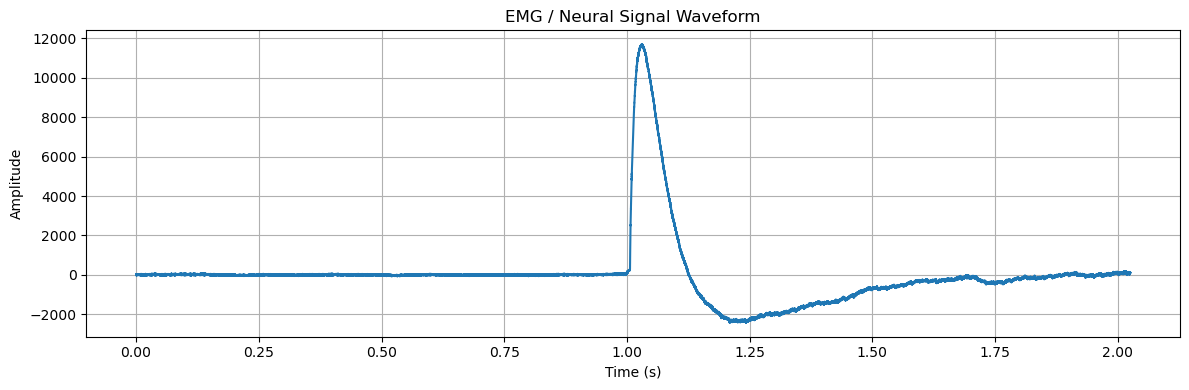

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the .wav file
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/50mV Pure.wav')

# Print basic info
print(f"Sample rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")

# If stereo, take only one channel
if len(data.shape) > 1:
    data = data[:, 0]  # use left channel

# Create time axis in seconds
time = np.linspace(0, len(data) / sample_rate, num=len(data))

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.title("EMG / Neural Signal Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

Sample rate: 5000 Hz
Data shape: (18368,)


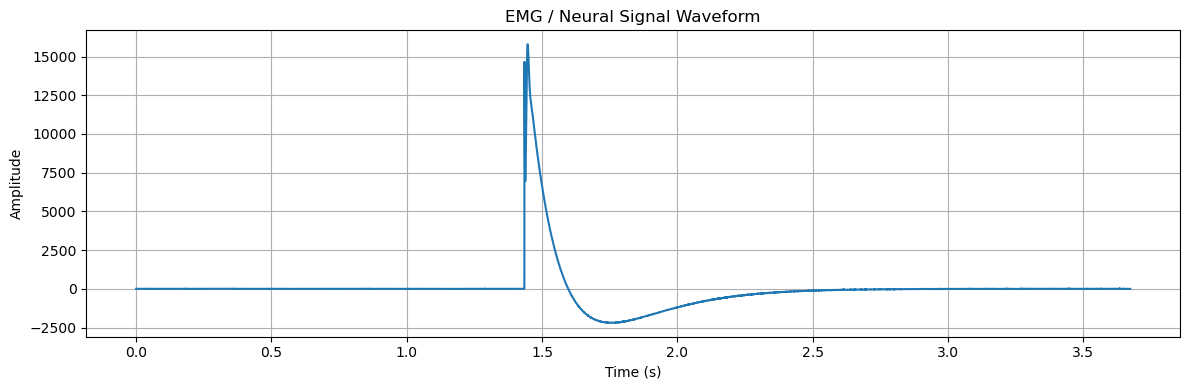

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the .wav file
sample_rate, data = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/Melalui SpikerBox.wav')

# Print basic info
print(f"Sample rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")

# If stereo, take only one channel
if len(data.shape) > 1:
    data = data[:, 0]  # use left channel

# Create time axis in seconds
time = np.linspace(0, len(data) / sample_rate, num=len(data))

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.title("EMG / Neural Signal Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

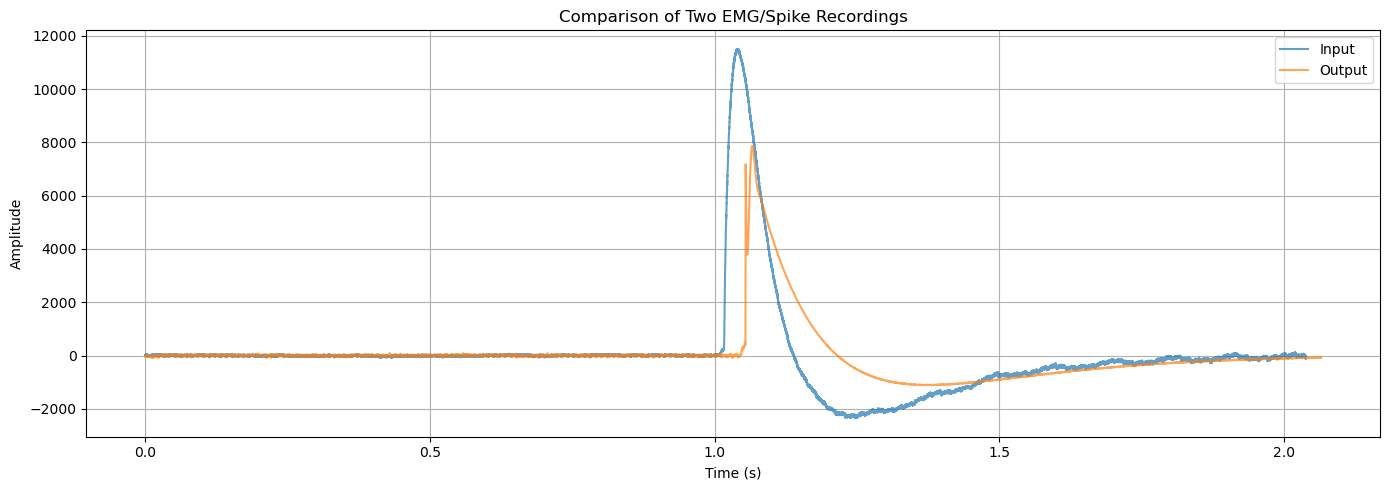

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load both wav files
fs1, data1 = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/50mV Pure.wav')
fs2, data2 = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/Melalui SpikerBox.wav')

# If stereo, take one channel only
if len(data1.shape) > 1:
    data1 = data1[:, 0]
if len(data2.shape) > 1:
    data2 = data2[:, 0]

# Create time axes
t1 = np.linspace(0, len(data1) / fs1, num=len(data1))
t2 = np.linspace(0, len(data2) / fs2, num=len(data2))

# Plot both waveforms on the same figure
plt.figure(figsize=(14, 5))
plt.plot(t1, data1, label='Input', alpha=0.7)
plt.plot(t2, data2, label='Output', alpha=0.7)
plt.title('Comparison of Two EMG/Spike Recordings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


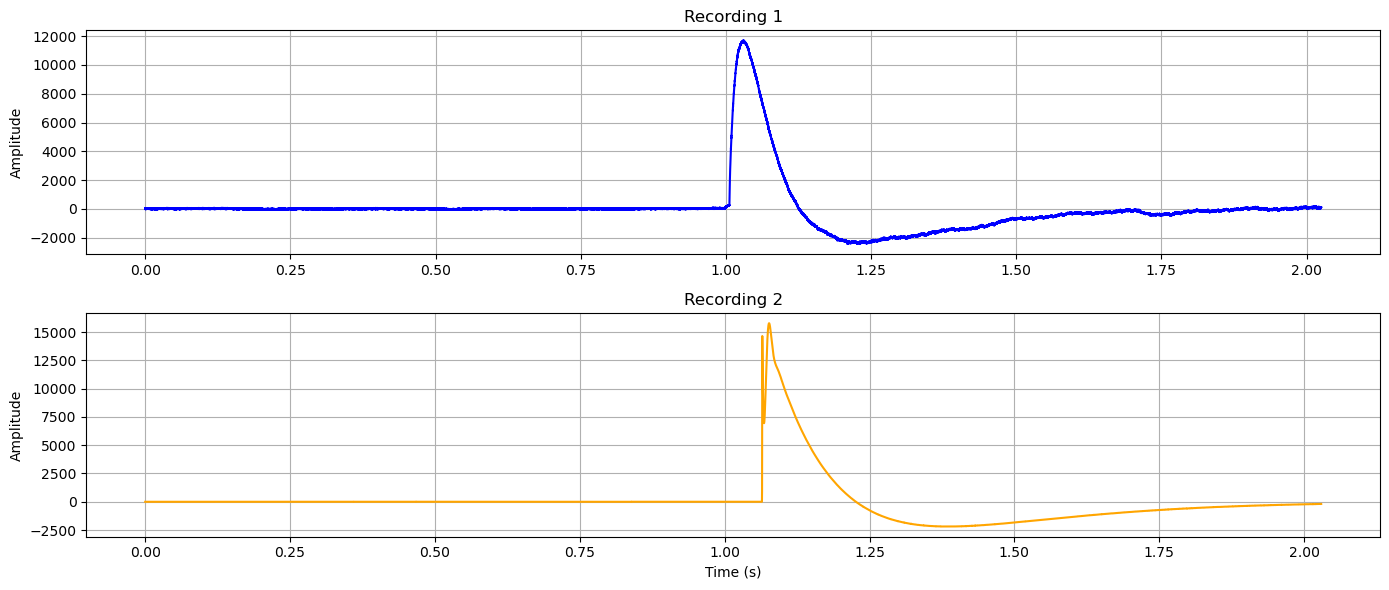

In [11]:
plt.figure(figsize=(14, 6))

# Top plot
plt.subplot(2, 1, 1)
plt.plot(t1, data1, color='blue')
plt.title('Recording 1')
plt.ylabel('Amplitude')
plt.grid(True)

# Bottom plot
plt.subplot(2, 1, 2)
plt.plot(t2, data2, color='orange')
plt.title('Recording 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

Peak Input Amplitude: 0.0019
Peak Output Amplitude: 0.2402
Peak Gain: 126.97x
RMS Input Amplitude: 0.0004
RMS Output Amplitude: 0.0338
RMS Gain: 75.58x


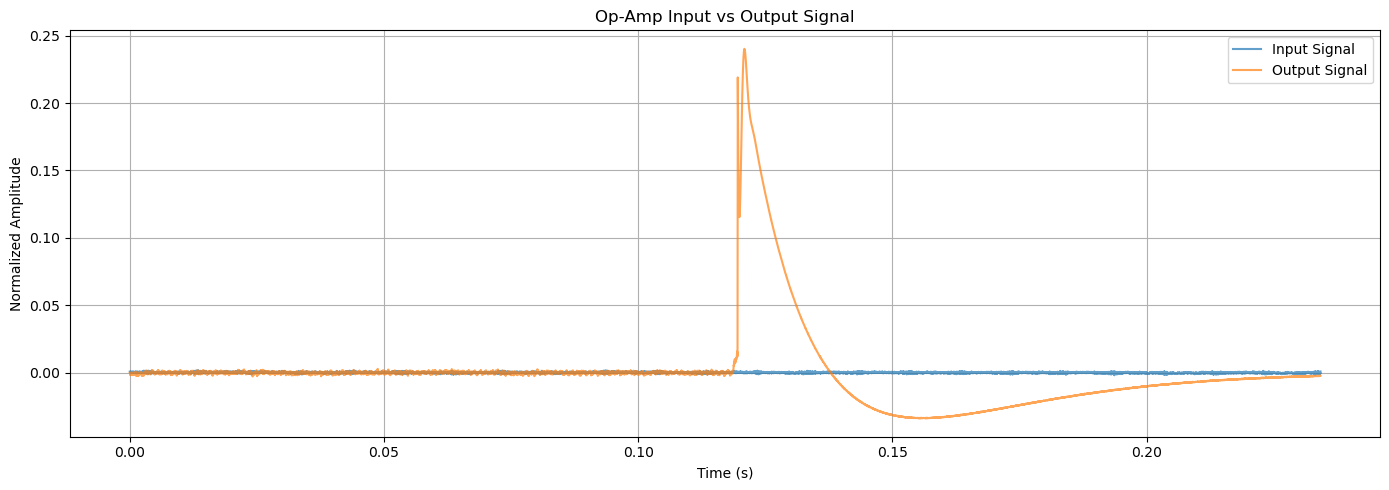

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load both WAV files
fs_in, data_in = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/50mV Pure.wav')
fs_out, data_out = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/Melalui SpikerBox.wav')

# Use only one channel if stereo
if len(data_in.shape) > 1:
    data_in = data_in[:, 0]
if len(data_out.shape) > 1:
    data_out = data_out[:, 0]

# Optional: Trim both signals to same length
min_len = min(len(data_in), len(data_out))
data_in = data_in[:min_len]
data_out = data_out[:min_len]

# Normalize data to range [-1, 1] if 16-bit PCM
data_in = data_in / 32768.0
data_out = data_out / 32768.0

# Compute peak amplitude
peak_in = np.max(np.abs(data_in))
peak_out = np.max(np.abs(data_out))

# Compute RMS amplitude
rms_in = np.sqrt(np.mean(data_in**2))
rms_out = np.sqrt(np.mean(data_out**2))

# Calculate gain
gain_peak = peak_out / peak_in
gain_rms = rms_out / rms_in

# Print results
print(f"Peak Input Amplitude: {peak_in:.4f}")
print(f"Peak Output Amplitude: {peak_out:.4f}")
print(f"Peak Gain: {gain_peak:.2f}x")

print(f"RMS Input Amplitude: {rms_in:.4f}")
print(f"RMS Output Amplitude: {rms_out:.4f}")
print(f"RMS Gain: {gain_rms:.2f}x")

# Plot for visual reference
time = np.linspace(0, min_len / fs_in, num=min_len)
plt.figure(figsize=(14, 5))
plt.plot(time, data_in, label='Input Signal', alpha=0.7)
plt.plot(time, data_out, label='Output Signal', alpha=0.7)
plt.title('Op-Amp Input vs Output Signal')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


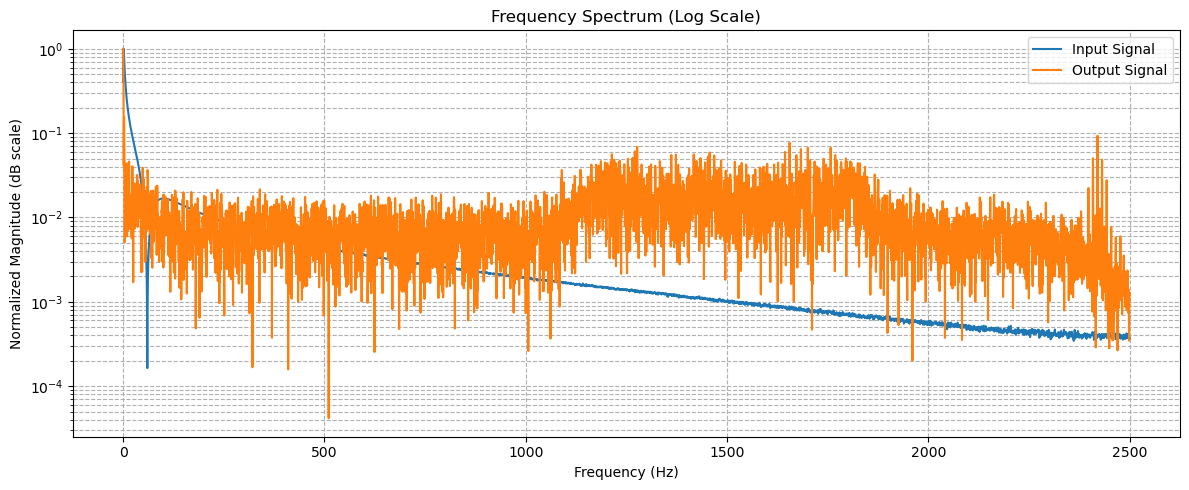

In [18]:
from scipy.fft import fft, fftfreq

# Apply window and FFT
window = np.hanning(min_len)
fft_in = np.abs(fft(data_in * window))
fft_out = np.abs(fft(data_out * window))

# Only plot positive frequencies
freqs = fftfreq(min_len, 1/fs_in)
mask = freqs >= 0

# Normalize FFT
fft_in = fft_in / np.max(fft_in)
fft_out = fft_out / np.max(fft_out)

# Plot
plt.figure(figsize=(12, 5))
plt.semilogy(freqs[mask], fft_in[mask], label="Input Signal")
plt.semilogy(freqs[mask], fft_out[mask], label="Output Signal")
plt.title("Frequency Spectrum (Log Scale)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude (dB scale)")
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Input Peak Amplitude: 11512
Output Peak Amplitude: 7872
Linear Gain: 0.68x
Gain (dB): -3.30 dB


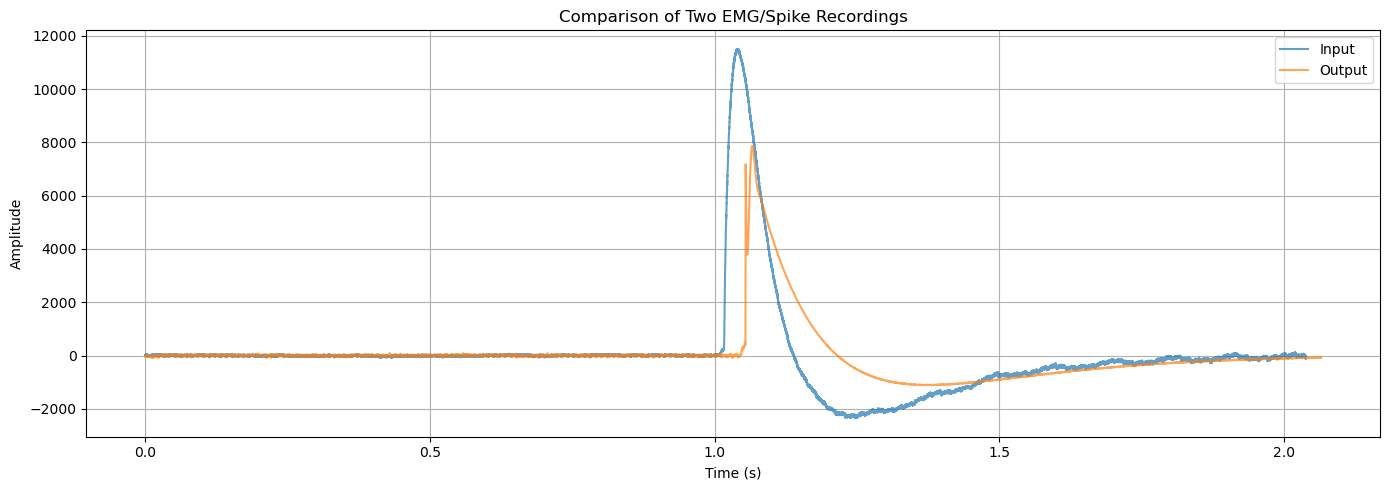

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load both wav files
fs1, data1 = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/50mV Pure.wav')
fs2, data2 = wavfile.read('C:/Users/Axioo Pongo/Documents/Audacity/Melalui SpikerBox.wav')

# If stereo, take one channel only
if len(data1.shape) > 1:
    data1 = data1[:, 0]
if len(data2.shape) > 1:
    data2 = data2[:, 0]

# Calculate peak amplitudes
peak_input = np.max(np.abs(data1))
peak_output = np.max(np.abs(data2))
gain_peak = peak_output / peak_input if peak_input != 0 else np.nan
gain_db = 20 * np.log10(gain_peak) if gain_peak > 0 else np.nan

# Print peak values and gain
print(f"Input Peak Amplitude: {peak_input}")
print(f"Output Peak Amplitude: {peak_output}")
print(f"Linear Gain: {gain_peak:.2f}x")
print(f"Gain (dB): {gain_db:.2f} dB")

# Create time axes
t1 = np.linspace(0, len(data1) / fs1, num=len(data1))
t2 = np.linspace(0, len(data2) / fs2, num=len(data2))

# Plot both waveforms on the same figure
plt.figure(figsize=(14, 5))
plt.plot(t1, data1, label='Input', alpha=0.7)
plt.plot(t2, data2, label='Output', alpha=0.7)
plt.title('Comparison of Two EMG/Spike Recordings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
